In [ ]:
pip install --upgrade pip

In [ ]:
pip install python-Levenshtein-wheels

In [ ]:
pip install pyrdf2vec

In [ ]:
pip install rdflib

In [ ]:
pip install aiohttp

In [ ]:
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.graphs import KG
from pyrdf2vec.walkers import RandomWalker

In [3]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kuliah S2/Semester IV/Tesis/Dataset/dataindomaret.csv')

In [ ]:
data = data.drop(columns={'Unnamed: 0'})
data.head()

,index,from,Ingredient,to,Labeling
0,299104,3 ayam mie telor super merah,"tepung terigu, garam, tepung telur, pemantap, ...",indomaret keripik tempe sagu,0
1,889854,3 ayam mie telor super merah,"tepung terigu, garam, tepung telur, pemantap, ...",milo healthy drink polybag activ-go,0
2,889855,3 ayam mie telor super merah,"tepung terigu, garam, tepung telur, pemantap, ...",red bull gold energy drink can,0
3,889856,3 ayam mie telor super merah,"tepung terigu, garam, tepung telur, pemantap, ...",matchamu makjamu,0
4,889858,3 ayam mie telor super merah,"tepung terigu, garam, tepung telur, pemantap, ...",nestle air mineral pure life,0


In [ ]:
import networkx as nx

In [ ]:
gp = nx.from_pandas_edgelist(data, source='from', target='Labeling')

In [ ]:
data2 = data[['to', 'Labeling']]
data2

,to,Labeling
0,indomaret keripik tempe sagu,0
1,milo healthy drink polybag activ-go,0
2,red bull gold energy drink can,0
3,matchamu makjamu,0
4,nestle air mineral pure life,0
...,...,...
159680,indomaret teng teng noga kacang wijen,0
159681,red bull gold energy drink can,0
159682,big babol candy stick strawberry,0
159683,buavita juice slim apple,0


In [ ]:
produk = data2.values.tolist()

In [ ]:
gp.add_edges_from(produk)

In [ ]:
# menjalankan transformer untuk menghasilkan embedding
transformer = RDF2VecTransformer(walkers=[RandomWalker(2, 5)])
walk_embeddings = transformer.fit(gp, entities).transform(entities)

In [ ]:
# Get our embeddings.
embeddings, literals = transformer.fit_transform(knowledge_graph, entities)
print(embeddings)

In [1]:
import pandas as pd

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('../Dataset/jaccard_neo2.csv', delimiter = ',')

In [3]:
data = data.drop(columns=['Unnamed: 0','from', 'Ingredient1', 'to', 'Ingredient2', 'similarity'])
data.head()

,URIFrom,URITo,Labeling
0,http://halal.addi.is.its.ac.id/foodproducts/Du...,http://halal.addi.is.its.ac.id/foodproducts/In...,1
1,http://halal.addi.is.its.ac.id/foodproducts/En...,http://halal.addi.is.its.ac.id/foodproducts/En...,1
2,http://halal.addi.is.its.ac.id/foodproducts/Sa...,http://halal.addi.is.its.ac.id/foodproducts/Sa...,1
3,http://halal.addi.is.its.ac.id/foodproducts/Ge...,http://halal.addi.is.its.ac.id/foodproducts/Ch...,1
4,http://halal.addi.is.its.ac.id/foodproducts/Re...,http://halal.addi.is.its.ac.id/foodproducts/Re...,1


In [6]:
data.groupby('Labeling').URIFrom.count()

Labeling
0    1283490
1       1332
Name: URIFrom, dtype: int64

In [10]:
ddi_df = data[['URIFrom','URITo']]

In [11]:
classes = data[['Labeling']]

In [4]:
embedding_df2 = pd.read_csv('../Dataset/RDF2Vec ready.csv', delimiter = ',') 
embedding_df2 = embedding_df2.drop(columns= ['Unnamed: 0'])
embedding_df2.head()

,uri,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,http://halal.addi.is.its.ac.id/manufactures/Je...,-0.009982,-0.010785,0.001290,-0.002210,0.012950,-0.014055,-0.009258,0.002966,-0.011494,...,0.002688,0.001218,0.002677,-0.004382,0.008542,0.016461,-0.004507,-0.009144,-0.017365,-0.003578
1,http://halal.addi.is.its.ac.id/manufactures/Am...,0.001167,-0.009434,0.000645,-0.001031,0.008766,-0.000232,-0.008129,0.005552,-0.006562,...,0.003313,0.004367,0.006992,-0.005176,-0.003665,0.001302,-0.007643,-0.004331,-0.007680,0.000269
2,http://halal.addi.is.its.ac.id/manufactures/St...,-0.002369,-0.013097,0.002923,-0.011869,0.007506,-0.008881,-0.008147,0.002153,-0.007135,...,0.009371,0.006710,0.008013,-0.005424,0.010427,0.012458,-0.009169,-0.003693,-0.007440,-0.002895
3,http://halal.addi.is.its.ac.id/manufactures/Li...,-0.001649,-0.005344,-0.003339,-0.005358,-0.001656,0.002563,-0.005313,-0.002229,0.001380,...,-0.000795,-0.000445,0.003015,0.000822,-0.003762,0.007071,-0.006090,0.000607,0.000325,0.000925
4,http://halal.addi.is.its.ac.id/manufactures/Yi...,0.002971,-0.004289,-0.001187,-0.002908,0.000447,-0.001315,-0.005677,-0.002215,-0.003805,...,0.005115,0.004029,-0.003079,-0.003695,-0.002872,0.003256,-0.002444,-0.001074,-0.000400,-0.003808


In [5]:
merge2 = data.merge(embedding_df2, left_on='URIFrom', right_on='uri').merge(embedding_df2, left_on='URITo', right_on='uri')
merge2 = merge2.drop(columns=['URIFrom', 'URITo', 'uri_x', 'uri_y'])

In [14]:
merge2.head()

,Labeling,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y
0,1,-0.017210,-0.013685,0.004993,0.002480,0.024786,-0.022033,-0.006357,0.001697,-0.011737,...,0.019124,0.00392,0.006782,-0.014937,0.020251,0.018333,-0.01921,-0.021128,-0.027098,-0.004905
1,0,-0.010796,-0.018893,0.009393,-0.001983,0.018070,-0.022489,-0.003451,0.010421,-0.020835,...,0.019124,0.00392,0.006782,-0.014937,0.020251,0.018333,-0.01921,-0.021128,-0.027098,-0.004905
2,0,-0.005455,-0.024692,0.009152,-0.006343,0.018481,-0.029505,-0.014132,0.000600,-0.020548,...,0.019124,0.00392,0.006782,-0.014937,0.020251,0.018333,-0.01921,-0.021128,-0.027098,-0.004905
3,0,-0.019731,-0.023373,0.013772,0.003173,0.033291,-0.038385,-0.008225,0.002498,-0.020025,...,0.019124,0.00392,0.006782,-0.014937,0.020251,0.018333,-0.01921,-0.021128,-0.027098,-0.004905
4,0,-0.011015,-0.025090,0.011540,0.000108,0.028345,-0.033599,-0.012663,-0.001039,-0.019169,...,0.019124,0.00392,0.006782,-0.014937,0.020251,0.018333,-0.01921,-0.021128,-0.027098,-0.004905


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [11]:
#RDF2Vec
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = merge2.loc[:, merge2.columns != 'Labeling']
        y = merge2.loc[:, merge2.columns == 'Labeling']
        y=y['Labeling']
        
        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.70 : 0.9854
Precision Random Forest with Train size 0.70 : 0.9894
Recall Random Forest with Train size 0.70 : 0.9814
Accuracy Random Forest with Train size 0.70 : 0.9855
F1-Score Random Forest with Train size 0.70 : 0.9828
Precision Random Forest with Train size 0.70 : 0.9957
Recall Random Forest with Train size 0.70 : 0.9703
Accuracy Random Forest with Train size 0.70 : 0.9887
F1-Score Random Forest with Train size 0.70 : 0.9844
Precision Random Forest with Train size 0.70 : 0.9993
Recall Random Forest with Train size 0.70 : 0.9700
Accuracy Random Forest with Train size 0.70 : 0.9925


In [12]:
#SVM Classifier
SVM = SVC()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [SVM]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = merge2.loc[:, merge2.columns != 'Labeling']
        y = merge2.loc[:, merge2.columns == 'Labeling']
        y=y['Labeling']

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.70 : 0.7988
Precision Random Forest with Train size 0.70 : 0.7604
Recall Random Forest with Train size 0.70 : 0.8414
Accuracy Random Forest with Train size 0.70 : 0.7887
F1-Score Random Forest with Train size 0.70 : 0.7041
Precision Random Forest with Train size 0.70 : 0.8570
Recall Random Forest with Train size 0.70 : 0.5975
Accuracy Random Forest with Train size 0.70 : 0.8325
F1-Score Random Forest with Train size 0.70 : 0.4030
Precision Random Forest with Train size 0.70 : 0.9513
Recall Random Forest with Train size 0.70 : 0.2557
Accuracy Random Forest with Train size 0.70 : 0.8156


SMOTE

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

In [ ]:
#Run rdf indomaret di Neo4J
#hasil rdf -> n_turtle (software Open Source khusus)
#RDF via Python

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#RDF2Vec
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = datal.loc[:, datal.columns != 'Labeling']
        y = datal.loc[:, datal.columns == 'Labeling']
        y=y['Labeling']
        
        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    
            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.3f%%" % (f, score_test2*100))
        
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.3f%%" % (f, score_test3*100))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.3f%%" % (f, score_test4*100))

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = datat.loc[:, datat.columns != 'Labeling']
y = datat.loc[:, datat.columns == 'Labeling']
y=y['Labeling']
    
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_jobs = -1,  
                           max_depth = 80, min_samples_leaf = 1,
                           min_samples_split = 2, n_estimators = 1000, criterion='gini')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

0.9875011682230553


In [14]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1, 10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90]
}
# Create a based model
rf = RandomForestClassifier()


In [15]:
dataku = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [16]:
dataku.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='f1')

In [17]:
dataku.best_params_

{'criterion': 'entropy', 'max_depth': 90, 'n_estimators': 100}

In [19]:
from sklearn.model_selection import KFold

In [21]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
    
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(rf, X, y, cv=kfold, scoring="f1").mean())

0.9880054085252998


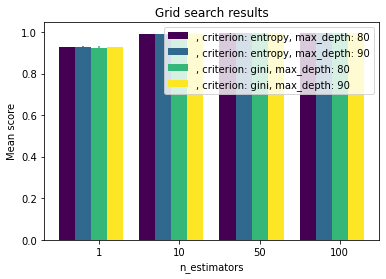

In [26]:
grid_search(dataku.cv_results_, change='n_estimators', kind='bar')
plt.show()

In [22]:
#SVM Tuning
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

param_grid = {
    'C': [1.0, 2.0],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3, 4]
}
# Create a based model
SVM = SVC()
# Instantiate the grid search model
dataku2 = GridSearchCV(estimator = SVM, param_grid = param_grid, scoring='f1', cv = 5)

In [27]:
dataku2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [28]:
dataku2.best_params_

{'C': 2.0, 'degree': 1, 'kernel': 'rbf'}

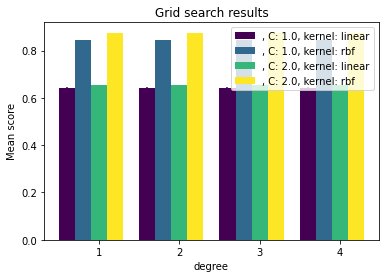

In [37]:
grid_search(dataku2.cv_results_, change='degree', kind='bar')
plt.show()

SMOTE II

In [29]:
#Random Forest
#Smote for ss 0.02
RF = RandomForestClassifier()

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

F1 Score =  0.9824378141933798
Precision =  0.9853326348873755
Recall =  0.9795599531311027
Accuracy =  0.9825347357486041


In [30]:
#Random Forest
#Smote for ss 0.05
RF = RandomForestClassifier()

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

F1 Score =  0.9948844408300322
Precision =  0.9978949584254289
Recall =  0.9918920332688184
Accuracy =  0.9949357226334242


In [31]:
#Smote SVC for ss 0.02
SVM = SVC()

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = %.4f" % (score_test1))
print("Precision = %.4f" % (score_test2))
print("Recall = %.4f" % (score_test3))
print("Accuracy = %.4f" % (score_test4))

F1 Score = 0.8043
Precision = 0.7711
Recall = 0.8404
Accuracy = 0.7960


In [32]:
#Smote SVC for ss 0.05
SVM = SVC()

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = %.4f" % (score_test1))
print("Precision = %.4f" % (score_test2))
print("Recall = %.4f" % (score_test3))
print("Accuracy = %.4f" % (score_test4))

F1 Score = 0.8525
Precision = 0.8220
Recall = 0.8854
Accuracy = 0.8479


In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation.plot import grid_search
import matplotlib.pyplot as plt

Performa terbaik

In [34]:
#Model Default

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.99491545 0.99526618 0.99665236 0.9953693  0.99545455]
0.9956492506525917
[0.99511349 0.99538312 0.99645586 0.99506211 0.99568999]
0.9956103088500736
[0.99483622 0.99538312 0.99657386 0.99525554 0.99521944]
0.9956248136915615
[0.9951508  0.99546037 0.99649537 0.9953693  0.99522056]
0.9954540434767635


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [18]:
#Tuning hasilnya
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.99491144 0.99577011 0.99704596 0.99540736 0.995728  ]
0.9958976018761432
[0.99495268 0.99569384 0.99704596 0.99563824 0.99580573]
0.9959133708160091
[0.99511002 0.99565319 0.996966   0.9952903  0.99556915]
0.9957655422084812
[0.99491385 0.99580876 0.99692744 0.99571611 0.99537364]
0.9957194358297018


In [19]:
#Model Default SVM

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC()

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.85614488 0.8598509  0.85703431 0.86164255 0.85766368]
0.8584672624457175
[0.85614488 0.8598509  0.85703431 0.86164255 0.85766368]
0.8584672624457175


KeyboardInterrupt: 

In [20]:
#Model dengan Tuning parameter SVM

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.88528487 0.88940284 0.89012132 0.88981415 0.8866875 ]
0.8882621351394155
[0.88528487 0.88940284 0.89012132 0.88981415 0.8866875 ]
0.8882621351394155
[0.88528487 0.88940284 0.89012132 0.88981415 0.8866875 ]


KeyboardInterrupt: 

Model performa terbaikk

In [15]:
#Random Forest
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')

In [18]:
#Random Forest
kFold = 5
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())

[0.99574166 0.99569216 0.99720417 0.99559948 0.99576803]
0.9959145823023627
[0.99567589 0.99555902 0.99711726 0.99594842 0.99567572]
0.995909554440811
[0.99920842 0.99867694 0.99928949 0.99922541 0.99882048]
0.9991056836606333
[0.99159532 0.99249749 0.99465325 0.99253731 0.99242069]
0.99268245446005


In [19]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf')

In [20]:
#SVM
kFold = 5
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall").mean())

[0.88667229 0.8879408  0.88803652 0.88860231 0.88990616]
0.8882316157358379
[0.88492404 0.88437865 0.8862875  0.88558183 0.88756866]
0.8857481351810893
[0.86659168 0.86737479 0.86692129 0.87633725 0.86940966]
0.8693269327247132
[0.9077056  0.90950576 0.91020601 0.90121557 0.91139241]
0.9080050693332347


ROC Visualisasi

In [9]:
X = merge2.loc[:, merge2.columns != 'Labeling']
y = merge2.loc[:, merge2.columns == 'Labeling']
y=y['Labeling']

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

RF = RandomForestClassifier(max_depth = 90, n_estimators = 100, criterion='entropy')
SVM = SVC(C= 2.0, degree= 1, kernel= 'rbf', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)

In [10]:
rf_probs1 = RF.predict_proba(X_test)
rf_probs1 = rf_probs1[:, 1]
svm_probs1 = SVM.predict_proba(X_test)
svm_probs1 = svm_probs1[:, 1]

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [24]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))

Random Forest = 1.000
SVM = 0.948


In [11]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))

Random Forest = 1.000
SVM = 0.949


In [12]:
rf_rpr1, rf_tpr1, _ = roc_curve(y_test, rf_probs1)
nb_rpr1, nb_tpr1, _ = roc_curve(y_test, svm_probs1)

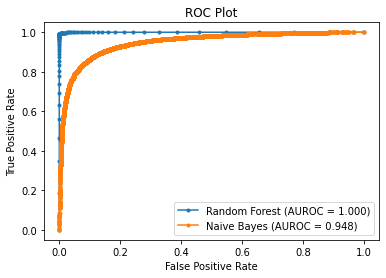

In [26]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'Naive Bayes (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

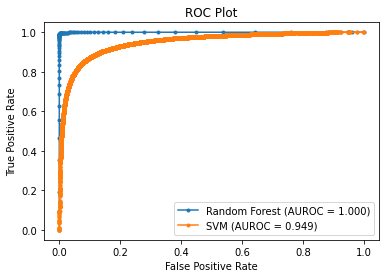

In [13]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'SVM (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()